In [2]:
!pip install numpy pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv

In [11]:
path = f"{os.path.dirname(os.path.abspath('__file__'))}/data/train.csv"

data = pd.read_csv(path)

data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    accuracies = []
    for i in range(iterations):

        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        accuracies.append(get_accuracy(get_predictions(A2), Y))

        if i % 10 == 0:
            print(f"[{i}]: {accuracies[-1]}")
    
    return W1, b1, W2, b2, accuracies

In [31]:
W1, b1, W2, b2, accuracies = gradient_descent(X_train, Y_train, 0.10, 2000)
np.savez('params.npz', W1=W1, b1=b1, W2=W2, b2=b2)


[0]: 0.1155609756097561
[10]: 0.22797560975609757
[20]: 0.3378048780487805
[30]: 0.4205121951219512
[40]: 0.48704878048780487
[50]: 0.539609756097561
[60]: 0.5826341463414634
[70]: 0.6179024390243902
[80]: 0.6476341463414634
[90]: 0.671609756097561
[100]: 0.6917560975609756
[110]: 0.7101463414634146
[120]: 0.7268292682926829
[130]: 0.7391463414634146
[140]: 0.7510243902439024
[150]: 0.7616341463414634
[160]: 0.7703658536585366
[170]: 0.7782682926829269
[180]: 0.7854146341463415
[190]: 0.7914634146341464
[200]: 0.796829268292683
[210]: 0.8021951219512196
[220]: 0.8070487804878049
[230]: 0.8116341463414635
[240]: 0.8154390243902438
[250]: 0.8190975609756097
[260]: 0.8222926829268292
[270]: 0.8251219512195122
[280]: 0.8280731707317073
[290]: 0.8304390243902439
[300]: 0.8329268292682926
[310]: 0.8354390243902439
[320]: 0.8377073170731707
[330]: 0.8402682926829268
[340]: 0.8420975609756097
[350]: 0.8438780487804878
[360]: 0.8457073170731707
[370]: 0.8470487804878049
[380]: 0.848609756097561

In [18]:
np.savez('params2.npz', W1=W1, b1=b1, W2=W2, b2=b2)


In [19]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


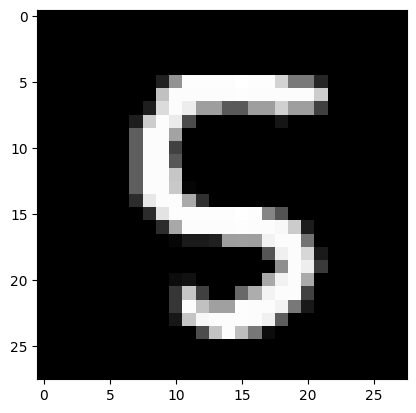

Prediction:  [8]
Label:  8


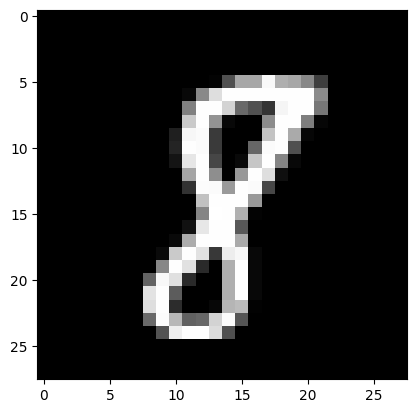

Prediction:  [2]
Label:  2


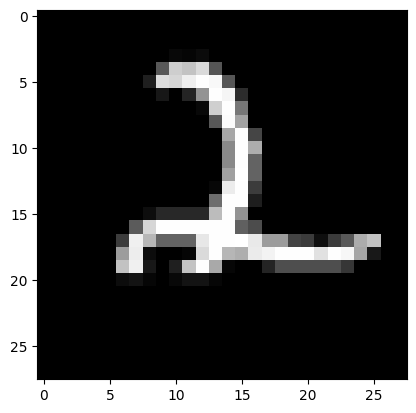

Prediction:  [3]
Label:  3


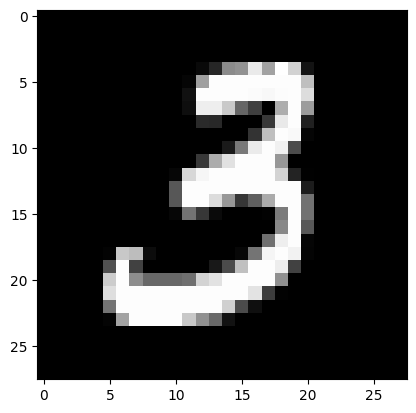

In [20]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [22]:
# X_train[:, 1, None]

In [30]:
data = np.load("params.npz")

# Access the weights and biases
W1 = data["W1"]
b1 = data["b1"]
W2 = data["W2"]
b2 = data["b2"]


dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

0.896